In [36]:
# Method to extract the word files

def createWordList(fileName):
    
    with open(fileName,'r') as f:
        text=f.read()
    words=text.split('\n')
    words[-2:]=[]
    return words

In [37]:
posWords=createWordList('pos.txt')

In [39]:
negWords=createWordList('neg.txt')

In [71]:
import tweepy
import csv

In [97]:
# Declare the keys
con_key='' #the empty string should be replace with consumer key
con_secret='' #the empty string should be replaced with consumer secret
acc_key='' #to be replaced with account key
acc_secret='' #to be replaced with account secret

def extract_tweets(accName):
    auth=tweepy.OAuthHandler(con_key,con_secret)
    auth.set_access_token(acc_key,acc_secret)
    
    # Extract tweets
    tweets=tweepy.API(auth).user_timeline(screen_name=accName)
    raw_tweets=[[tweet.text.encode("utf-8")] for tweet in tweets]
    #print(raw_tweets)
    with open('Tweet_text.txt', 'w+') as fw:
        writer=csv.writer(fw)
        #writer.writerow(['id','date','text'])
        writer.writerows(raw_tweets)
    return raw_tweets


In [98]:
raw_tweets=extract_tweets('@<twitterhandle>') # replace with the twitter handle

In [146]:
# Read the tweets from the file
with open('tweet_text.txt', 'r') as f2:
    tweet_texts=f2.read()
    tweet_texts=tweet_texts.split('\n')
    

In [147]:
# tokenize the tweets
import re
def tokenize_tweets(theTweet):
    allTokens=re.findall(r'\b\w[\w-]*\b', theTweet.lower())
    #print(allTokens)
    return allTokens

tweet_pos_words=[]
tweet_neg_words=[]
def calculate_words(tweet):
      
    tokensInTweet=tokenize_tweets(tweet)
    for token in tokensInTweet:
        if token in posWords:
            tweet_pos_words.append(token)            
        elif token in negWords:
            tweet_neg_words.append(token)
        #else:
            #print('%s word not in dictionary' % token)    
    return (len(tweet_pos_words)-len(tweet_neg_words))

def analyze_tweets(tweets):
    overAllPos=1
    overAllNeg=0
    countOfPosTweet=0
    countOfNegTweet=0
    for eachTweet in tweets:
        res=calculate_words(eachTweet)
        #print('Tweet result = %s' % res)
        if res>overAllPos:
            countOfPosTweet+=1
        elif res< overAllNeg:
            countOfNegTweet+=1
    print('How many tweet are positive : %s' % countOfPosTweet)
    print('How many tweet are negative : %s' % countOfNegTweet)
            
        
        
            
            
    
    
    

In [148]:
analyze_tweets(tweet_texts)

How many tweet are positive : 13
How many tweet are negative : 0


In [153]:
# plot the frequest positive words
import nltk, matplotlib
%matplotlib inline
freqPosWords=nltk.FreqDist(tweet_pos_words)
freqPosWords.tabulate()

     up  honest learned   sunny    good 
      3       1       1       1       1 


In [154]:
# plot the frequest positive words
freqNegWords=nltk.FreqDist(tweet_neg_words)
freqNegWords.tabulate()

    no wicked    not 
     1      1      1 


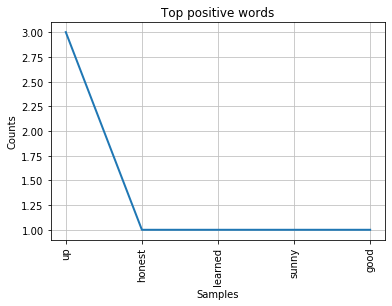

In [155]:
# Plot the most frequest positive words
freqPosWords.plot(title='Top positive words')

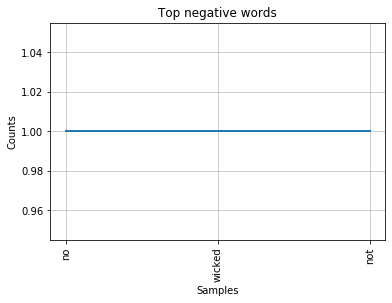

In [156]:
# Plot the most frequest negative words
freqNegWords.plot(title='Top negative words')